### Check whether 13 CSV files are exist

In [89]:
# Import necessary libraries
import pandas as pd

# Hardcoded file paths
file_paths = [
    "../data/WorldCup_Stats/1975_Match_Stats.csv",
    "../data/WorldCup_Stats/1979_Match_Stats.csv",
    "../data/WorldCup_Stats/1983_Match_Stats.csv",
    "../data/WorldCup_Stats/1987_Match_Stats.csv",
    "../data/WorldCup_Stats/1992_Match_Stats.csv",
    "../data/WorldCup_Stats/1996_Match_Stats.csv",
    "../data/WorldCup_Stats/1999_Match_Stats.csv",
    "../data/WorldCup_Stats/2003_Match_Stats.csv",
    "../data/WorldCup_Stats/2007_Match_Stats.csv",
    "../data/WorldCup_Stats/2011_Match_Stats.csv",
    "../data/WorldCup_Stats/2015_Match_Stats.csv",
    "../data/WorldCup_Stats/2019_Match_Stats.csv",
    "../data/WorldCup_Stats/2023_Match_Stats.csv",
]

# Ensure the correct number of files is provided
if len(file_paths) != 13:
    print("Error: Please specify exactly 13 CSV file paths.")
else:
    # Initialize a list to hold DataFrames
    dataframes = []

    # Load each file and handle potential errors
    for file_path in file_paths:
        try:
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)
            # Add the DataFrame to the list
            dataframes.append(df)
        except FileNotFoundError:
            print(f"Error: File not found -> {file_path}")
        except pd.errors.EmptyDataError:
            print(f"Error: File is empty -> {file_path}")
        except Exception as e:
            print(f"An error occurred while processing {file_path}: {e}")

    # Validate all files were successfully loaded
    if len(dataframes) == 13:
        print(f"Successfully loaded and combined all 13 files. Combined DataFrame info:")
    else:
        print(
            f"Warning: Only {len(dataframes)} out of 13 files were successfully loaded.")

Successfully loaded and combined all 13 files. Combined DataFrame info:


### Merge 13 CSV files

In [90]:
import pandas as pd
import glob

# Define the folder path where your CSV files are stored
folder_path = "../data/WorldCup_Stats/*.csv"

# Use glob to find all CSV files in the folder
file_paths = glob.glob(folder_path)  # This gets all .csv files in the folder

# Check if any CSV files are found
if not file_paths:
    print("No CSV files found in the directory. Please check the folder path.")
else:
    # Read each CSV file into a DataFrame and store them in a list
    data_frames = [pd.read_csv(file) for file in file_paths]

    # Combine all DataFrames into one (row-wise)
    cricket_df = pd.concat(data_frames, ignore_index=True)

    # Save the combined DataFrame to a new CSV file
    output_file_name = "../data/out/combined_world_cup_stats.csv"
    cricket_df.to_csv(output_file_name, index=False)

    print(f"Combined CSV file has been saved as '{output_file_name}'.")
    
print(cricket_df.head())

Combined CSV file has been saved as '../data/out/combined_world_cup_stats.csv'.
   Unnamed: 0.1  Unnamed: 0        date        venue match_category team_1  \
0             0          11         NaN   Nottingham   League-Match    PAK   
1             1           5         NaN        Leeds   League-Match    EAf   
2             2          12  1975-06-18        Leeds     Semi-Final    ENG   
3             3           8  1975-06-14   Birmingham   League-Match    ENG   
4             4          13         NaN     The Oval     Semi-Final     NZ   

  team_2  team_1_runs  team_1_wickets  team_2_runs  team_2_wickets  \
0     SL        330.0             6.0        138.0             0.0   
1    IND        120.0             0.0        123.0             0.0   
2    AUS         93.0             0.0         94.0             6.0   
3    EAf        290.0             5.0         94.0             0.0   
4     WI        158.0             0.0        159.0             5.0   

                              

In [91]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0.1', 'Unnamed: 0', 'commentary_line']
cricket_df.drop(columns=columns_to_drop, inplace=True)

# Step 2.2: Check for null values
print(cricket_df.isnull().sum())

# Drop rows where any of the specified columns have null values
columns_to_check = ['team_1_runs', 'team_1_wickets',
                    'team_2_runs', 'team_2_wickets']
# cricket_df.dropna(subset=columns_to_check, inplace=True)


cricket_df.head()


date              164
venue               0
match_category      0
team_1              0
team_2              0
team_1_runs        10
team_1_wickets     10
team_2_runs        15
team_2_wickets     15
result              0
pom                18
best_batters      278
best_bowlers      278
world_cup_year      0
host_country        0
dtype: int64


,date,venue,match_category,team_1,team_2,team_1_runs,team_1_wickets,team_2_runs,team_2_wickets,result,pom,best_batters,best_bowlers,world_cup_year,host_country
0,NaN,Nottingham,League-Match,PAK,SL,330.0,6.0,138.0,0.0,Pakistan won by 192 runs,Zaheer Abbas,NaN,NaN,1975,England
1,NaN,Leeds,League-Match,EAf,IND,120.0,0.0,123.0,0.0,India won by 10 wickets (with 181 balls remain...,Farokh Engineer,NaN,NaN,1975,England
2,1975-06-18,Leeds,Semi-Final,ENG,AUS,93.0,0.0,94.0,6.0,Australia won by 4 wickets (with 188 balls rem...,Gary Gilmour,NaN,NaN,1975,England
3,1975-06-14,Birmingham,League-Match,ENG,EAf,290.0,5.0,94.0,0.0,England won by 196 runs,John Snow,NaN,NaN,1975,England
4,NaN,The Oval,Semi-Final,NZ,WI,158.0,0.0,159.0,5.0,West Indies won by 5 wickets (with 119 balls r...,Alvin Kallicharran,NaN,NaN,1975,England


In [92]:
# Save the processed DataFrame
cricket_df.to_csv("../data/out/processed_matches.csv", index=False)
print("Processed data saved to 'data/processed_matches.csv'.")

Processed data saved to 'data/processed_matches.csv'.


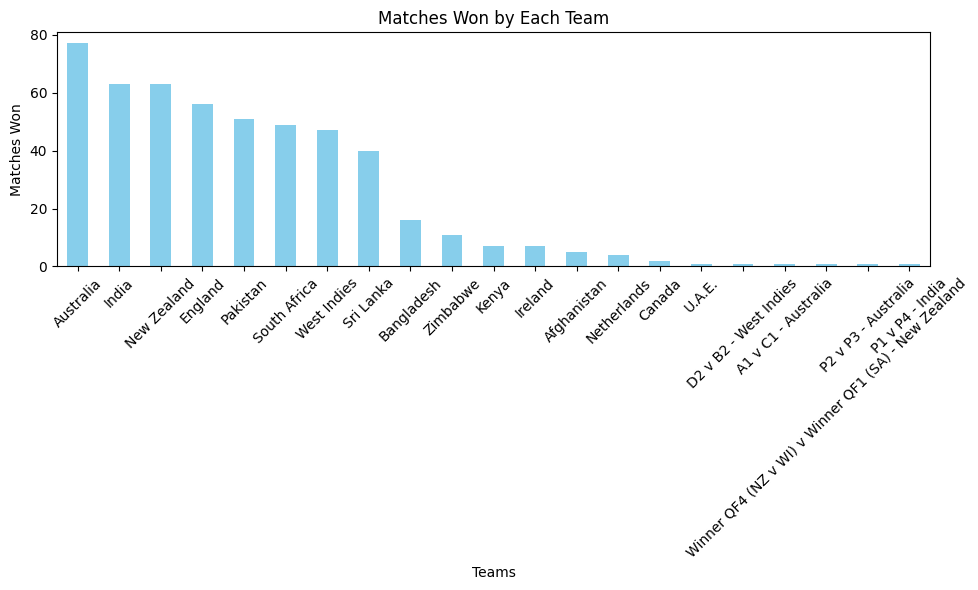

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'winning_team' is derived from the 'result' column


def extract_winning_team(result):
    if pd.isna(result) or not isinstance(result, str):
        return None
    if 'won by' in result.lower():
        return result.split('won')[0].strip()
    return None


cricket_df['winning_team'] = cricket_df['result'].apply(extract_winning_team)

# Count matches won by each team
winning_team_counts = cricket_df['winning_team'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
winning_team_counts.plot(kind='bar', color='skyblue')
plt.title('Matches Won by Each Team')
plt.xlabel('Teams')
plt.ylabel('Matches Won')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

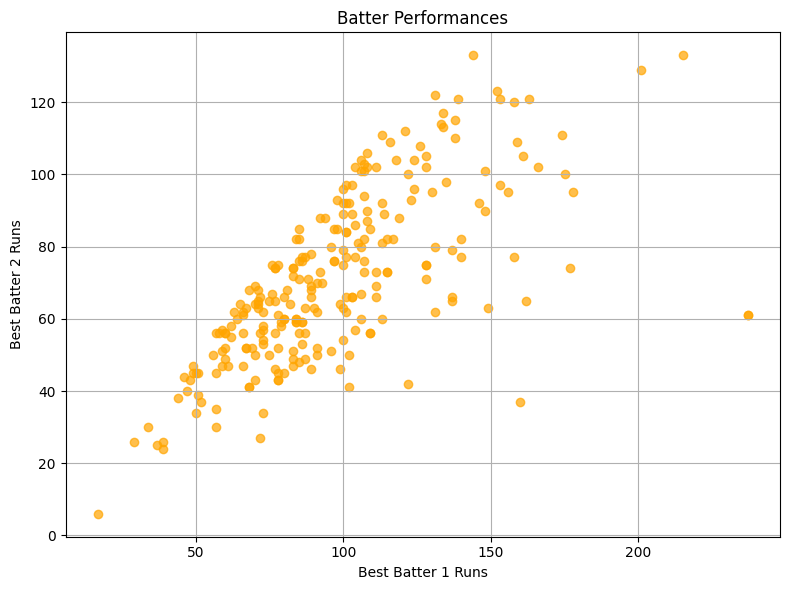

In [94]:
# Extract runs from 'best_batters' column
cricket_df['best_batter_1_runs'] = cricket_df['best_batters'].str.extract(
    r'(\d+)').astype(float)
cricket_df['best_batter_2_runs'] = cricket_df['best_batters'].str.extract(
    r',.*?(\d+)').astype(float)

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(cricket_df['best_batter_1_runs'],
            cricket_df['best_batter_2_runs'], color='orange', alpha=0.7)
plt.title('Batter Performances')
plt.xlabel('Best Batter 1 Runs')
plt.ylabel('Best Batter 2 Runs')
plt.grid(True)
plt.tight_layout()
plt.show()